# Table of Contents

>[Table of Contents](#scrollTo=0ZS2M7Ffl_Ln)

>>[Import libraries](#scrollTo=FdsX3z8Fjm7C)

>[Data Cleaning](#scrollTo=OH4P9sfUYOuF)

>>[Renaming columns](#scrollTo=dYi_djXCjvfg)

>>[Standardizing courses](#scrollTo=VyDrsVEmj0QD)

>>[Standardizing Year](#scrollTo=m4PC4s0Fj7_G)

>>[Standardizing CGPA](#scrollTo=o2ZRol9wkAAc)

>>[Proper datatypes](#scrollTo=uYVO53vKkGTn)

>>[Checking for missing values](#scrollTo=wb2kh9BEkJ_R)

>>>[Fill in missing value in Age](#scrollTo=J4AsOwxokPlP)

>[EDA](#scrollTo=P_8YmVOadZUk)

>>[Summary Statistics](#scrollTo=jCmfxzlOkT7n)

>>[Distribution Plots](#scrollTo=6kJdFQn5kZjJ)

>>[Frequency Plots for Categorical Variables](#scrollTo=IktKAzVykfi-)

>>[.get_dummies for corr analysis](#scrollTo=Vwmcpzt1krgL)

>>[Correlation Analysis](#scrollTo=DzAh2XFfkmpR)

>>[Cross-tabulation/Contingency table](#scrollTo=Hp9C_04rk1UV)

>[Modelling](#scrollTo=-LDRljh0SNZc)

>>[convert categorical to numeric (one hot encoding) similar to get_dummies](#scrollTo=Ro_l9c02k8AI)

>>[Model 1 for Feature Importance](#scrollTo=w6G8P7HnlGKi)

>>[Feature Importance Visualization](#scrollTo=ToBRca0flcBn)

>>[redo after feature importance analysis](#scrollTo=kEtefUVWYEJE)

>>[Try other models with new data](#scrollTo=dZi68jrEb0va)



## Import libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [25]:
df = pd.read_csv("Student Mental health.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [26]:
col = df.columns # to check the column names
col

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [27]:
df.drop(columns=['Timestamp'], inplace=True)
df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


# Data Cleaning

## Renaming columns

In [28]:
df.rename(columns={
    'Choose your gender': 'Gender',
    'Age': 'Age',
    'What is your course?': 'Course',
    'Your current year of Study': 'Year',
    'What is your CGPA?': 'CGPA',
    'Marital status': 'MaritalStatus',
    'Do you have Depression?': 'Depression',
    'Do you have Anxiety?': 'Anxiety',
    'Do you have Panic attack?': 'PanicAttack',
    'Did you seek any specialist for a treatment?': 'SpecialistTreatment'}, inplace=True)
df.head()

,Gender,Age,Course,Year,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,SpecialistTreatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [29]:
pd.unique(df["Course"])

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

## Standardizing courses

In [30]:
# reassigning them to their respective faculty,this information was provided under discussion in kaggle
course_mapping = {
    'Engineering': 'Engineering',
    'Islamic education': 'RSEP',
    'BIT': 'IT',
    'Laws': 'Law',
    'Mathemathics': 'EconManagement',
    'Pendidikan islam': 'RSEP',
    'BCS': 'IT',
    'Human Resources': 'EconManagement',
    'Irkhs': 'Economics and management',
    'Psychology': 'RSEP',
    'KENMS': 'EconManagement',
    'Accounting ': 'EconManagement',
    'ENM': 'IT',
    'Marine science': 'Environment',
    'KOE': 'Engineering',
    'Banking Studies': 'EconManagement',
    'Business Administration': 'EconManagement',
    'Law': 'Law',
    'KIRKHS': 'EconManagement',
    'Usuluddin ': 'EconManagement',
    'TAASL': 'Linguistics',
    'Engine': 'Engineering',
    'ALA': 'Liberal Arts',
    'Biomedical science': 'Medicine',
    'koe': 'Engineering',
    'Kirkhs': 'EconManagement',
    'BENL': 'Linguistics',
    'Benl': 'Linguistics',
    'IT': 'IT',
    'CTS': 'IT',
    'engin': 'Engineering',
    'Econs': 'EconManagement',
    'MHSC': 'Medicine',
    'Malcom': 'EconManagement',
    'Kop': 'Medicine',
    'Human Sciences ': 'EconManagement',
    'Biotechnology': 'Medicine',
    'Communication ': 'RSEP',
    'Diploma Nursing': 'Medicine',
    'Pendidikan Islam ': 'RSEP',
    'Radiography': 'Medicine',
    'psychology': 'RSEP',
    'Fiqh fatwa ': 'RSEP',
    'DIPLOMA TESL': 'Linguistics',
    'Koe': 'RSEP',
    'Fiqh': 'RSEP',
    'Islamic Education': 'RSEP',
    'Nursing ': 'Medicine',
    'Pendidikan Islam': 'RSEP'
}

# Apply the mapping to the 'course' column
df['Course'] = df['Course'].map(course_mapping)

# Now, the 'course' column contains standardized course names
df

,Gender,Age,Course,Year,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,SpecialistTreatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,RSEP,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,IT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Law,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,EconManagement,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,IT,year 1,3.50 - 4.00,No,No,Yes,No,No
97,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,Female,19.0,Medicine,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,Female,23.0,RSEP,year 4,3.50 - 4.00,No,No,No,No,No


In [31]:
pd.unique(df["Course"])


array(['Engineering', 'RSEP', 'IT', 'Law', 'EconManagement',
       'Economics and management', 'Environment', 'Linguistics',
       'Liberal Arts', 'Medicine'], dtype=object)

In [32]:
pd.unique(df["Year"])

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

## Standardizing Year

In [33]:
year_mapping = {'year 1' : 1,
                'Year 1' : 1,
                'year 2' : 2,
                'Year 2' : 2,
                'year 3' : 3,
                'Year 3' : 3,
                'year 4' : 4}

df['Year'] = df['Year'].map(year_mapping)

In [34]:
pd.unique(df["CGPA"])

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

## Standardizing CGPA

In [35]:
cgpa_mapping = {'0 - 1.99' : 0,
              '2.00 - 2.49':1,
              '2.50 - 2.99':2,
              '3.00 - 3.49':3,
              '3.50 - 4.00':4,
              '3.50 - 4.00 ': 4}

df['CGPA'] = df['CGPA'].map(cgpa_mapping)

## Proper datatypes

In [36]:
df['Gender'] = df['Gender'].astype('category')
df['Course'] = df['Course'].astype('category')
df['Year'] = df['Year'].astype('int')
df['CGPA'] = df['CGPA'].astype('int')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['Depression'] = df['Depression'].astype('category')
df['Anxiety'] = df['Anxiety'].astype('category')
df['PanicAttack'] = df['PanicAttack'].astype('category')
df['SpecialistTreatment'] = df['SpecialistTreatment'].astype('category')
# df['Age'] = df['Age'].astype('category')

## Checking for missing values

In [37]:
df.isnull().sum()

Gender                 0
Age                    1
Course                 0
Year                   0
CGPA                   0
MaritalStatus          0
Depression             0
Anxiety                0
PanicAttack            0
SpecialistTreatment    0
dtype: int64

In [38]:
df['Age'].dtypes

dtype('float64')

In [39]:
df['Age'] = df['Age'].astype('float')

### Fill in missing value in Age

In [40]:
# since its college students mean should be fine
df["Age"]=df["Age"].fillna(df["Age"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               101 non-null    category
 1   Age                  101 non-null    float64 
 2   Course               101 non-null    category
 3   Year                 101 non-null    int64   
 4   CGPA                 101 non-null    int64   
 5   MaritalStatus        101 non-null    category
 6   Depression           101 non-null    category
 7   Anxiety              101 non-null    category
 8   PanicAttack          101 non-null    category
 9   SpecialistTreatment  101 non-null    category
dtypes: category(7), float64(1), int64(2)
memory usage: 4.3 KB


#EDA

## Summary Statistics

In [41]:
df.describe()

,Age,Year,CGPA
count,101.000000,101.000000,101.000000
mean,20.530000,1.970297,3.277228
std,2.483767,0.994540,0.939349
min,18.000000,1.000000,0.000000
25%,18.000000,1.000000,3.000000
50%,19.000000,2.000000,3.000000
75%,23.000000,3.000000,4.000000
max,24.000000,4.000000,4.000000


## Distribution Plots

Text(0.5, 1.0, 'Age Distribution')

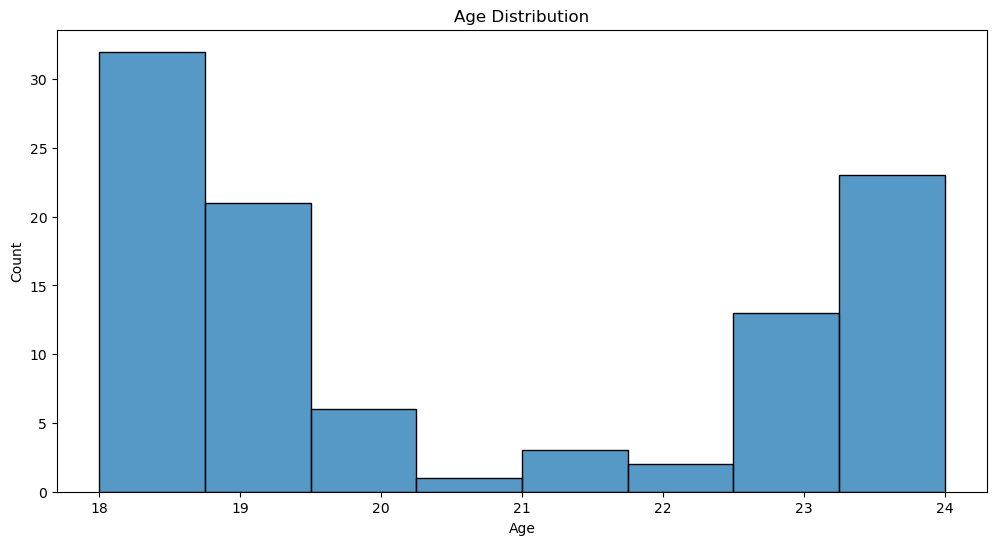

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'])
plt.title('Age Distribution')

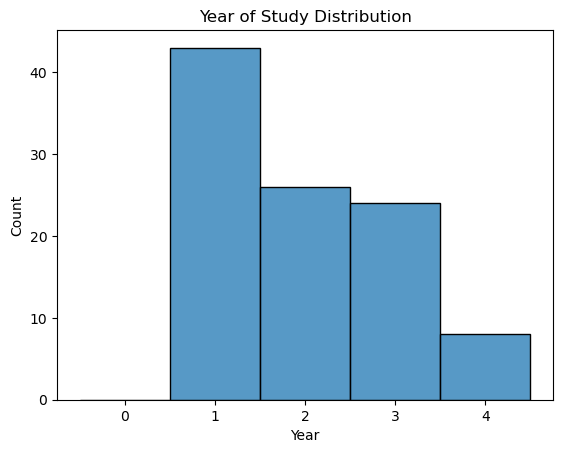

In [43]:
sns.histplot(df['Year'], discrete = True, binrange = [0,4])
plt.title('Year of Study Distribution')
plt.show()

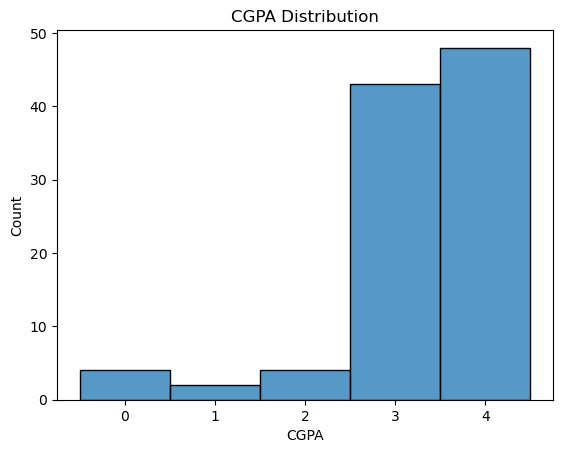

In [44]:
sns.histplot(df['CGPA'],discrete = True)
plt.title('CGPA Distribution')
plt.show()

CGPA reminder
* '0.00 - 1.99' : 0,
* '2.00 - 2.49' : 1,
* '2.50 - 2.99' : 2,
* '3.00 - 3.49' : 3,
* '3.50 - 4.00' : 4,

## Frequency Plots for Categorical Variables

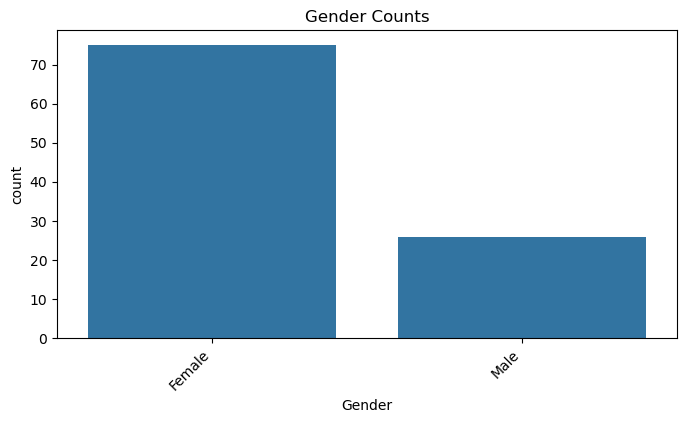

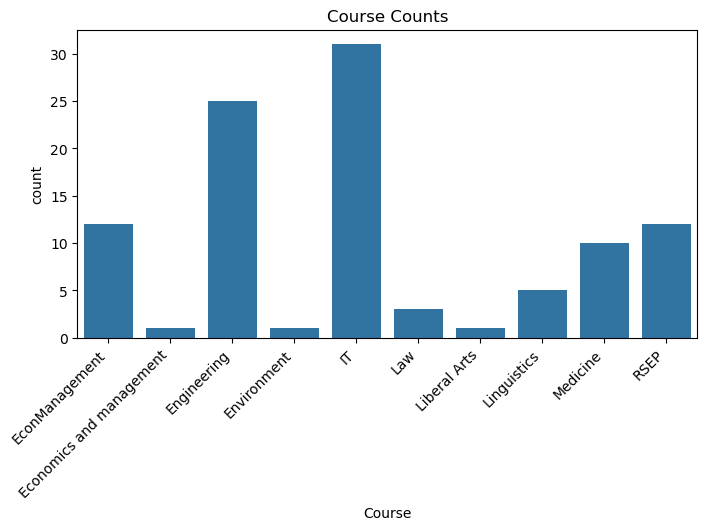

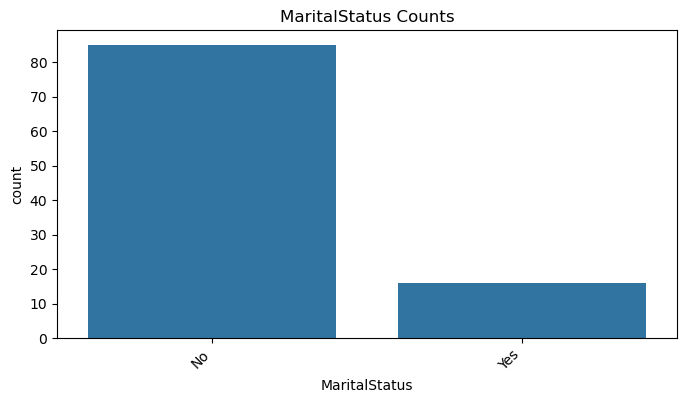

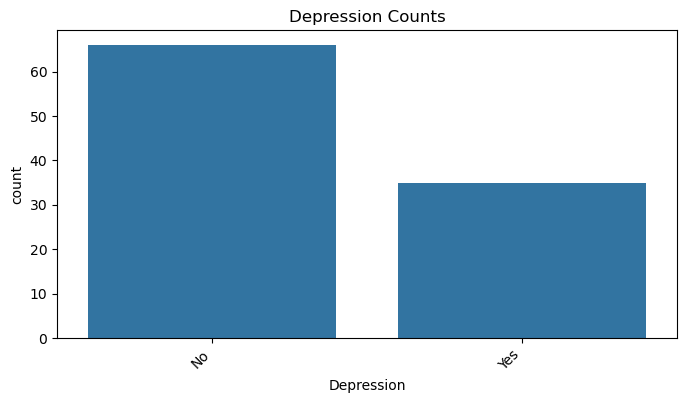

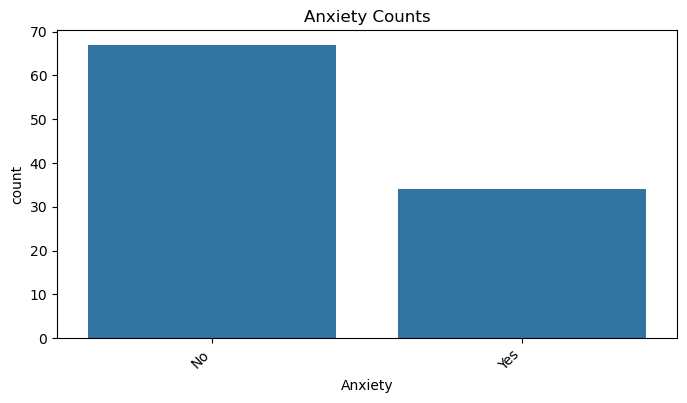

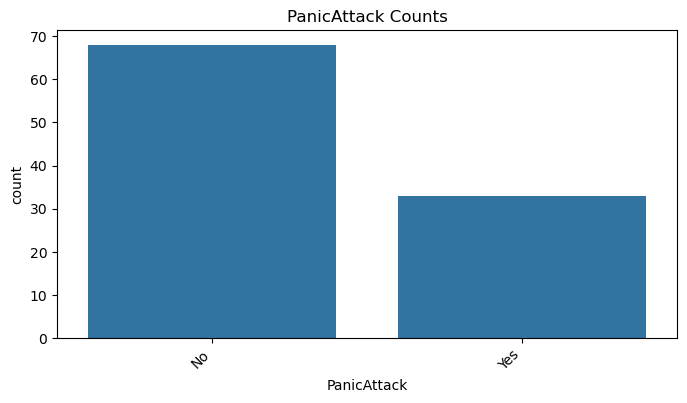

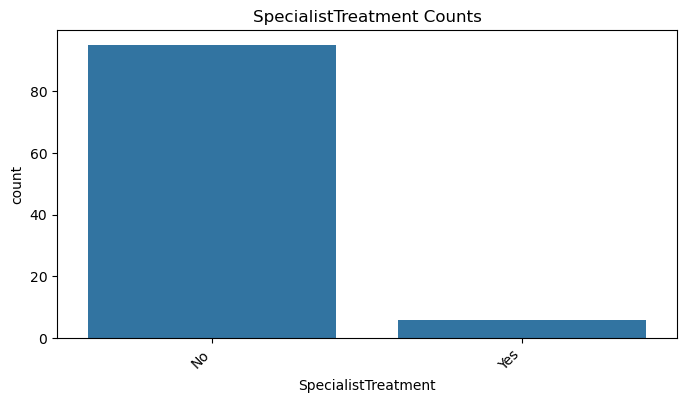

In [45]:
def categorical_plot(data, column_name):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=column_name)
    plt.title(f'{column_name} Counts')
    plt.xticks(rotation=45, ha = 'right')
    plt.show()

categorical_cols = ['Gender', 'Course', 'MaritalStatus', 'Depression', 'Anxiety', 'PanicAttack', 'SpecialistTreatment']

for col in categorical_cols:
    categorical_plot(df,col)

## .get_dummies for corr analysis

In [46]:
# dummy variables dropping first
df_dummy = pd.get_dummies(df,
                          columns=['Gender','MaritalStatus', 'Depression', 'Anxiety', 'PanicAttack', 'SpecialistTreatment'],
                          drop_first=True)

# For the 'Course' column, create dummy variables without drop_first
course_dummy = pd.get_dummies(df['Course'], prefix='Course')

df_dummies = pd.concat([df_dummy,course_dummy], axis = 1)

df_dummies.drop(columns = "Course", inplace = True)
df_dummies

,Age,Year,CGPA,Gender_Male,MaritalStatus_Yes,Depression_Yes,Anxiety_Yes,PanicAttack_Yes,SpecialistTreatment_Yes,Course_EconManagement,Course_Economics and management,Course_Engineering,Course_Environment,Course_IT,Course_Law,Course_Liberal Arts,Course_Linguistics,Course_Medicine,Course_RSEP
0,18.0,1,3,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False
1,21.0,2,3,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
2,19.0,1,3,True,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False
3,22.0,3,3,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False
4,23.0,4,3,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,21.0,1,4,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
97,18.0,2,3,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False
98,19.0,3,4,False,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False
99,23.0,4,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


## Correlation Analysis

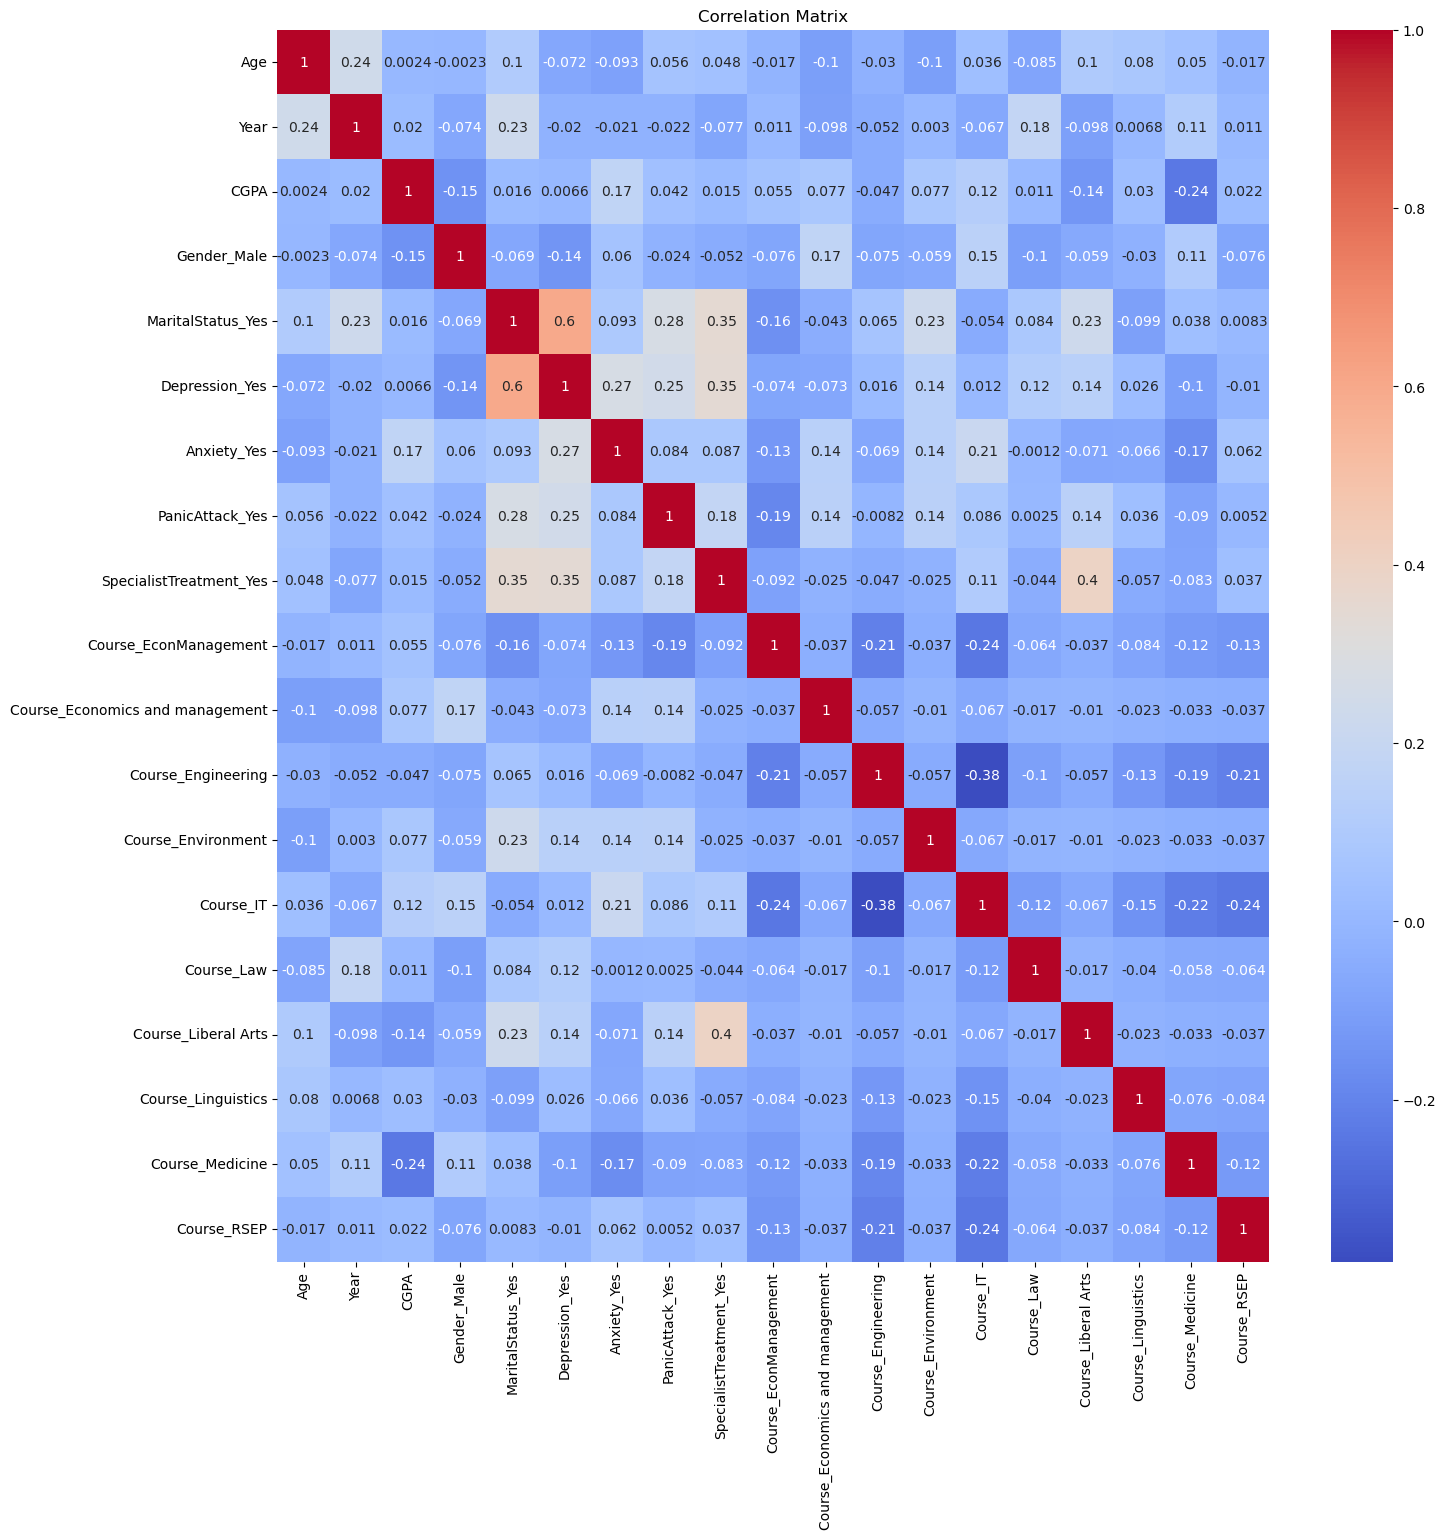

In [47]:
correlation_matrix = df_dummies.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/var/folders/9s/jm3b8ty51h53y3qs5b2zqvvc0000gn/T/ipykernel_77897/3631210895.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_age_by_marital_status = df.groupby('MaritalStatus')['Age'].median().reset_index()


Text(0.5, 1.0, 'Median Age by Marital Status')

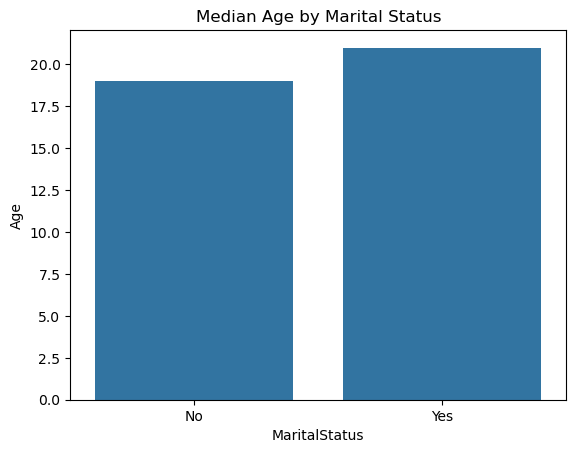

In [48]:
median_age_by_marital_status = df.groupby('MaritalStatus')['Age'].median().reset_index()
sns.barplot(data=median_age_by_marital_status, x='MaritalStatus', y='Age')
plt.title('Median Age by Marital Status')

/var/folders/9s/jm3b8ty51h53y3qs5b2zqvvc0000gn/T/ipykernel_77897/2450930987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_with_depression = df.groupby('Depression').size() / len(df) * 100


Text(0.5, 1.0, 'Percentage of Students with Depression')

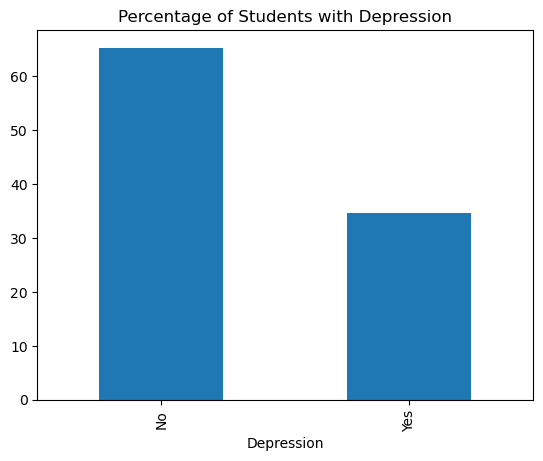

In [49]:
percentage_with_depression = df.groupby('Depression').size() / len(df) * 100
percentage_with_depression.plot(kind='bar')
plt.title('Percentage of Students with Depression')

In [50]:
# Filter for students with 'Depression' and 'SpecialistTreatment'
depression_treatment = df[
    (df['Depression'] == 'Yes') &
    (df['SpecialistTreatment'] == 'Yes')
]

# Filter for students with 'Anxiety' and 'SpecialistTreatment'
anxiety_treatment = df[
    (df['Anxiety'] == 'Yes') &
    (df['SpecialistTreatment'] == 'Yes')
]

# Filter for students with 'PanicAttack' and 'SpecialistTreatment'
panic_attack_treatment = df[
    (df['PanicAttack'] == 'Yes') &
    (df['SpecialistTreatment'] == 'Yes')
]

# Group by 'Gender' and count the students with each combination of conditions
grouped_data = pd.DataFrame({
    'Gender': df['Gender'].unique(),
    'Depression_and_Treatment': depression_treatment.groupby('Gender').size(),
    'Anxiety_and_Treatment': anxiety_treatment.groupby('Gender').size(),
    'PanicAttack_and_Treatment': panic_attack_treatment.groupby('Gender').size()
})

# Print the result
grouped_data



/var/folders/9s/jm3b8ty51h53y3qs5b2zqvvc0000gn/T/ipykernel_77897/1707555871.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Depression_and_Treatment': depression_treatment.groupby('Gender').size(),
/var/folders/9s/jm3b8ty51h53y3qs5b2zqvvc0000gn/T/ipykernel_77897/1707555871.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Anxiety_and_Treatment': anxiety_treatment.groupby('Gender').size(),
/var/folders/9s/jm3b8ty51h53y3qs5b2zqvvc0000gn/T/ipykernel_77897/1707555871.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed

,Gender,Depression_and_Treatment,Anxiety_and_Treatment,PanicAttack_and_Treatment
Gender,,,,
Female,Female,5,2,4
Male,Male,1,1,0


## Cross-tabulation/Contingency table

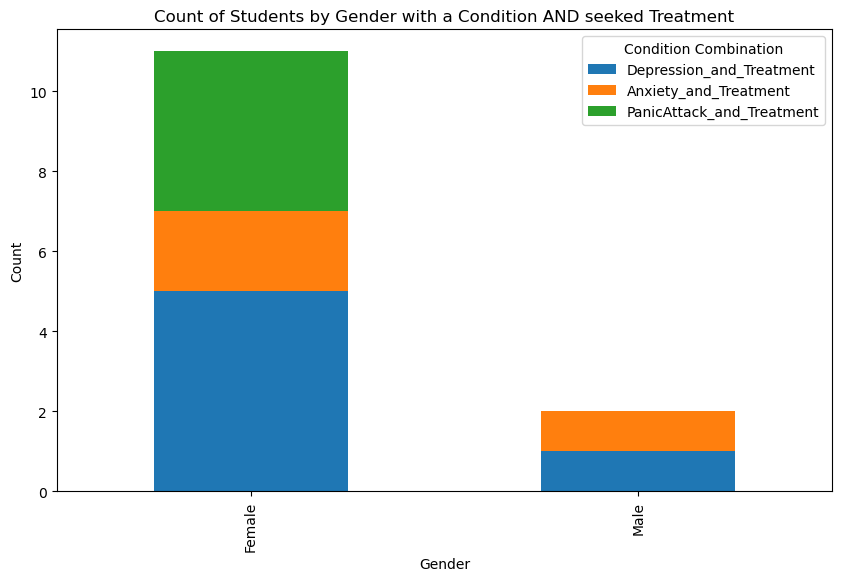

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))

grouped_data.plot(kind='bar', x='Gender', stacked=True, ax = ax)
plt.title('Count of Students by Gender with a Condition AND seeked Treatment')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Condition Combination')

plt.show()

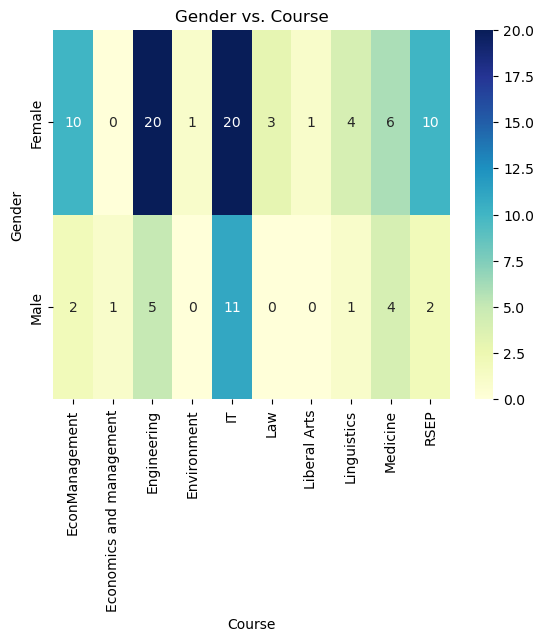

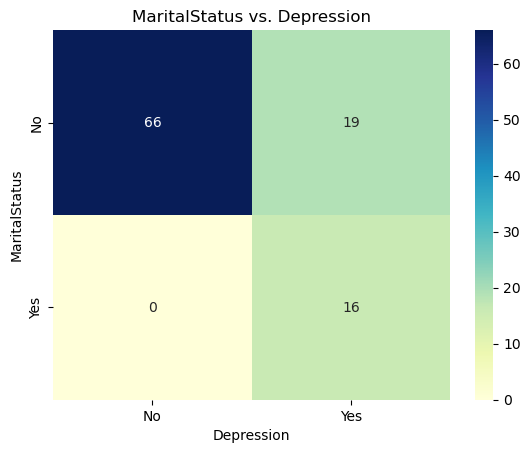

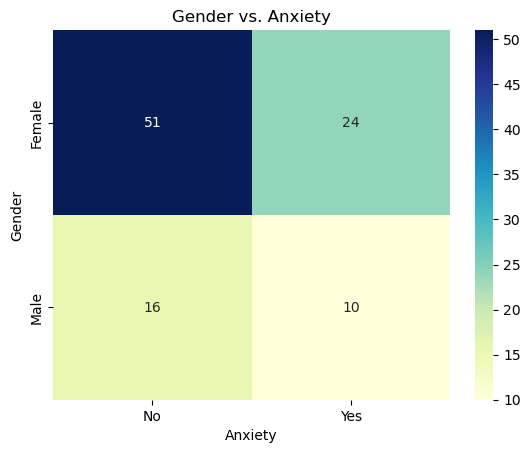

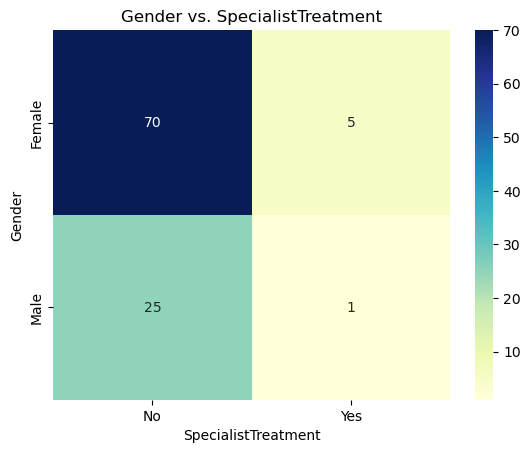

In [52]:
# Gender vs. Course
contingency_gender_course = pd.crosstab(df['Gender'], df['Course'])
sns.heatmap(contingency_gender_course, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Gender vs. Course')
plt.show()

# MaritalStatus vs. Depression
contingency_marital_depression = pd.crosstab(df['MaritalStatus'], df['Depression'])
sns.heatmap(contingency_marital_depression, annot=True, fmt='d', cmap='YlGnBu')
plt.title('MaritalStatus vs. Depression')
plt.show()

# Gender vs. Anxiety
contingency_gender_anxiety = pd.crosstab(df['Gender'], df['Anxiety'])
sns.heatmap(contingency_gender_anxiety, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Gender vs. Anxiety')
plt.show()

# MaritalStatus vs. SpecialistTreatment
contingency_marital_treatment = pd.crosstab(df['Gender'], df['SpecialistTreatment'])
sns.heatmap(contingency_marital_treatment, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Gender vs. SpecialistTreatment')
plt.show()


# Modelling

Dataframe needs to be numerical, I will be replacing them binary manually so I can specify which is 1 and which is 0
> For tree-based models, drop_first = True is not necessesary since tree-based models are not sensitive to multicollinearity.

In [53]:
# numeric_df = df.copy()
# numeric_df["Gender"].replace({"Female": 1, "Male": 0}, inplace = True)
# numeric_df["Gender"] = numeric_df["Gender"].astype(int)

# numeric_df["MaritalStatus"].replace({"Yes":"1", "No": "0"}, inplace = True)
# numeric_df["MaritalStatus"] = numeric_df["MaritalStatus"].astype(int)

# numeric_df["Anxiety"].replace({"Yes":"1", "No": "0"}, inplace = True)
# numeric_df["Anxiety"] = numeric_df["Anxiety"].astype(int)

# numeric_df["PanicAttack"].replace({"Yes":"1", "No": "0"}, inplace = True)
# numeric_df["PanicAttack"] = numeric_df["PanicAttack"].astype(int)

# numeric_df["SpecialistTreatment"].replace({"Yes":"1", "No": "0"}, inplace = True)
# numeric_df["SpecialistTreatment"] = numeric_df["SpecialistTreatment"].astype(int)

# #Depression
# numeric_df["Depression"].replace({"Yes":"1", "No": "0"}, inplace = True)
# numeric_df["Depression"] = numeric_df["Depression"].astype(int)

# X = pd.concat([numeric_df,course_dummy], axis = 1)
# y = numeric_df["Depression"]
# X.drop(columns = ["Depression", "Course"], inplace = True)

# numeric_df.info()

## convert categorical to numeric (one hot encoding) similar to get_dummies

In [54]:
def convert_categorical_to_numeric(df, columns_to_convert, mapping={"Yes": "1", "No": "0"}):
    numeric_df = df.copy()
    for column in columns_to_convert:
        numeric_df[column].replace(mapping, inplace = True)
        numeric_df[column] = numeric_df[column].astype(int)
    return numeric_df

columns_to_convert = ["MaritalStatus", "Anxiety", "PanicAttack", "SpecialistTreatment", "Depression"]

numeric_df = convert_categorical_to_numeric(df, columns_to_convert)

numeric_df["Gender"].replace({"Female": 1, "Male": 0}, inplace = True)
numeric_df["Gender"] = numeric_df["Gender"].astype(int)


numeric_course = pd.concat([numeric_df,course_dummy], axis = 1)
numeric_course

/var/folders/9s/jm3b8ty51h53y3qs5b2zqvvc0000gn/T/ipykernel_77897/2883136699.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numeric_df[column].replace(mapping, inplace = True)
/var/folders/9s/jm3b8ty51h53y3qs5b2zqvvc0000gn/T/ipykernel_77897/2883136699.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  numeric_d

,Gender,Age,Course,Year,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,SpecialistTreatment,Course_EconManagement,Course_Economics and management,Course_Engineering,Course_Environment,Course_IT,Course_Law,Course_Liberal Arts,Course_Linguistics,Course_Medicine,Course_RSEP
0,1,18.0,Engineering,1,3,0,1,0,1,0,False,False,True,False,False,False,False,False,False,False
1,0,21.0,RSEP,2,3,0,0,1,0,0,False,False,False,False,False,False,False,False,False,True
2,0,19.0,IT,1,3,0,1,1,1,0,False,False,False,False,True,False,False,False,False,False
3,1,22.0,Law,3,3,1,1,0,0,0,False,False,False,False,False,True,False,False,False,False
4,0,23.0,EconManagement,4,3,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,21.0,IT,1,4,0,0,1,0,0,False,False,False,False,True,False,False,False,False,False
97,0,18.0,Engineering,2,3,0,1,1,0,0,False,False,True,False,False,False,False,False,False,False
98,1,19.0,Medicine,3,4,1,1,0,1,0,False,False,False,False,False,False,False,False,True,False
99,1,23.0,RSEP,4,4,0,0,0,0,0,False,False,False,False,False,False,False,False,False,True


## Model 1 for Feature Importance

In [55]:
#@title Split target and features
y = numeric_course['Depression']

# now we will remove the target label
X = numeric_course.drop(["Depression", "Course"],axis=1)
X

print(y.tail)
X.tail()

<bound method NDFrame.tail of 0      1
1      0
2      1
3      1
4      0
      ..
96     0
97     1
98     1
99     0
100    0
Name: Depression, Length: 101, dtype: int64>


,Gender,Age,Year,CGPA,MaritalStatus,Anxiety,PanicAttack,SpecialistTreatment,Course_EconManagement,Course_Economics and management,Course_Engineering,Course_Environment,Course_IT,Course_Law,Course_Liberal Arts,Course_Linguistics,Course_Medicine,Course_RSEP
96,1,21.0,1,4,0,1,0,0,False,False,False,False,True,False,False,False,False,False
97,0,18.0,2,3,0,1,0,0,False,False,True,False,False,False,False,False,False,False
98,1,19.0,3,4,1,0,1,0,False,False,False,False,False,False,False,False,True,False
99,1,23.0,4,4,0,0,0,0,False,False,False,False,False,False,False,False,False,True
100,0,20.0,2,3,0,0,0,0,False,False,False,False,False,False,False,False,True,False


In [56]:
# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Model
rf_model = RandomForestClassifier()

# Train model
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Get feature importance
feature_importance = rf_model.feature_importances_
print("Feature importance:", feature_importance)

Feature importance: [0.04683897 0.1132339  0.07275277 0.07480551 0.26932932 0.11581891
 0.0642773  0.06501845 0.02823567 0.00570841 0.03137746 0.00544091
 0.03955558 0.02075611 0.00249887 0.00870397 0.011381   0.02426687]


## Feature Importance Visualization

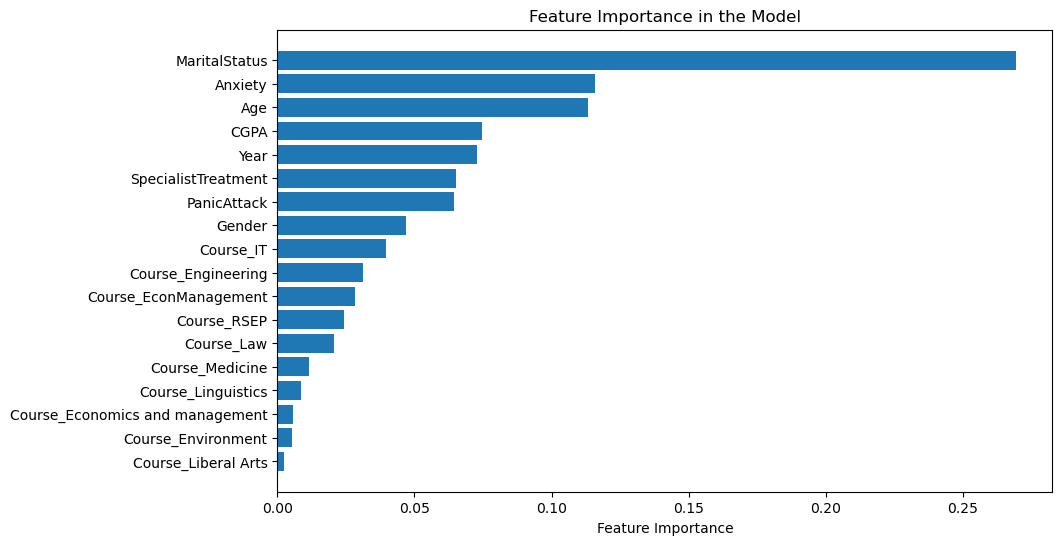

In [57]:
# Create a DataFrame to associate feature names with importance scores
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in the Model')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

Based on the plot above, the courses have very little importance so we will be removing it.

## redo after feature importance analysis

In [58]:
#@title Split target and features
y = numeric_df['Depression']

# now we will remove the target label
X = numeric_df.drop(["Depression", "Course"],axis=1)
X

print(y.tail)
X.tail()

<bound method NDFrame.tail of 0      1
1      0
2      1
3      1
4      0
      ..
96     0
97     1
98     1
99     0
100    0
Name: Depression, Length: 101, dtype: int64>


,Gender,Age,Year,CGPA,MaritalStatus,Anxiety,PanicAttack,SpecialistTreatment
96,1,21.0,1,4,0,1,0,0
97,0,18.0,2,3,0,1,0,0
98,1,19.0,3,4,1,0,1,0
99,1,23.0,4,4,0,0,0,0
100,0,20.0,2,3,0,0,0,0


In [59]:
# # Logistic Regression
# lr_model = LogisticRegression()
# lr_model.fit(X_train, y_train)

# # Support Vector Machine
# svm_model = SVC()
# svm_model.fit(X_train, y_train)

# # Decision Tree
# dt_model = DecisionTreeClassifier()
# dt_model.fit(X_train, y_train)

# #predictions
# lr_predictions = lr_model.predict(X_test)
# svm_predictions = svm_model.predict(X_test)
# dt_predictions = dt_model.predict(X_test)

## Try other models with new data

In [60]:
#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and train different models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}  # Store evaluation results for each model

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)

    # Store the results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }

# Print the evaluation results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("\n")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Random Forest
Accuracy: 0.81
Precision: 0.90
Recall: 0.75
F1 Score: 0.82
Confusion Matrix:
[[8 1]
 [3 9]]


Model: Logistic Regression
Accuracy: 0.81
Precision: 1.00
Recall: 0.67
F1 Score: 0.80
Confusion Matrix:
[[9 0]
 [4 8]]


Model: Support Vector Machine
Accuracy: 0.43
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[ 9  0]
 [12  0]]


Model: Decision Tree
Accuracy: 0.81
Precision: 0.90
Recall: 0.75
F1 Score: 0.82
Confusion Matrix:
[[8 1]
 [3 9]]


Model: Gradient Boosting
Accuracy: 0.81
Precision: 0.83
Recall: 0.83
F1 Score: 0.83
Confusion Matrix:
[[ 7  2]
 [ 2 10]]




In [61]:
import joblib
joblib.dump(models["Gradient Boosting"], "gradient_boosting_model.pkl")
print("Model saved as gradient_boosting_model.pkl")

Model saved as gradient_boosting_model.pkl
